<a href="https://colab.research.google.com/github/pokem1402/section_project_one/blob/main/EDA_3_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load dataset

  EDA1, EDA2 과정에서 교정하고 정정한 데이터 셋을 부른다.


In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/dataset/vgames2_final.csv").drop(axis=1, columns="Unnamed: 0")

Mounted at /content/drive


In [2]:
df.Year = df.Year.astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16583 entries, 0 to 16582
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16583 non-null  object 
 1   Platform     16583 non-null  object 
 2   Year         16583 non-null  int64  
 3   Genre        16583 non-null  object 
 4   Publisher    16583 non-null  object 
 5   NA_Sales     16583 non-null  float64
 6   EU_Sales     16583 non-null  float64
 7   JP_Sales     16583 non-null  float64
 8   Other_Sales  16583 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


# 2. Data Visualization

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## 1) One-variable charts

In [4]:
# (1) Platform

df.Platform = df.Platform.astype("category")

### (1) 플랫폼 별 타이틀 갯수

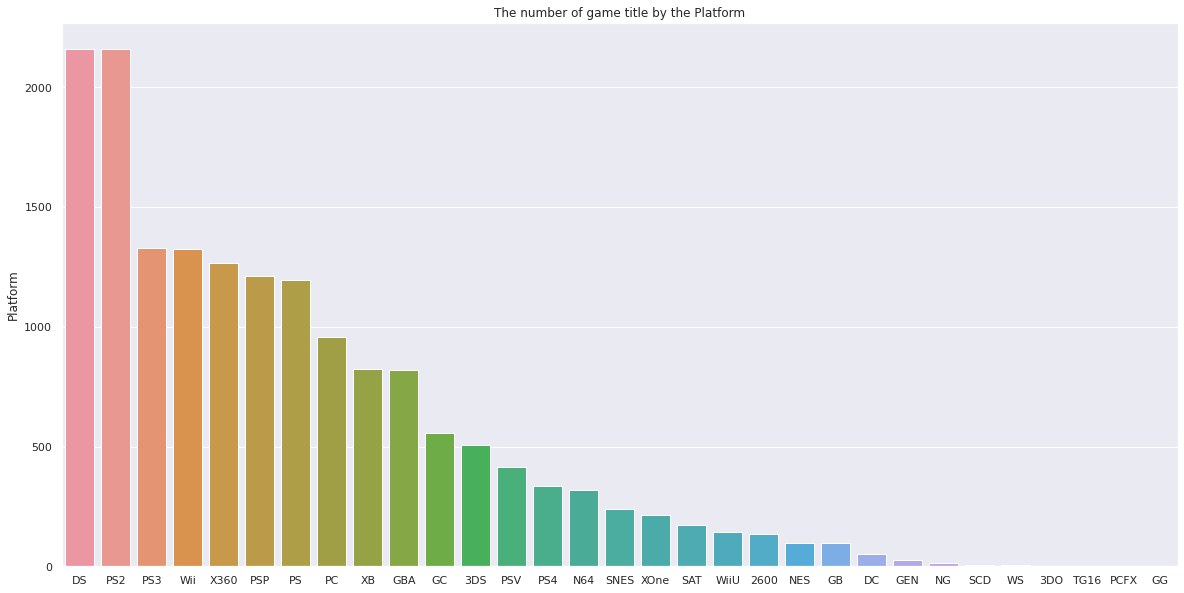

In [91]:
# (1) 플랫폼 별 타이틀 갯수

fig, ax = plt.subplots()

y = df.Platform.value_counts()
x = y.index
sns.barplot(x=x, y=y, order=df.Platform.value_counts().index)
plt.title("The number of game title by the Platform")
plt.show()

In [92]:
df.Platform.value_counts()

DS      2161
PS2     2159
PS3     1327
Wii     1323
X360    1264
PSP     1213
PS      1195
PC       958
XB       824
GBA      820
GC       556
3DS      508
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

#### <1> 데이터의 문제점 : 2022년, 혹은 이후를 대비하기엔 다소 오래된 데이터

 우리가 가진 데이터를 확인하면 전 시대를 걸쳐서 하나의 카테고리로 분류되었을 PC를 제외하고는 많은 비중을 차지하는 데이터들이 이전 세대의 플랫폼인 것을 확인할 수 있다.

그 외에는 2022년 현재에서 주요하게 사용되는 플랫폼인 Nintendo Switch(NS), PS5, Xbox Series X(XSX)에 대한 데이터는 존재하지 않는다. (PSV는 Playstation Vita의 줄임말로 Playstation Potable인 휴대용 플레이스테이션의 후속 기기이다)

따라서 플랫폼에 대한 데이터는 데이터의 분석의 목적인 ***다음 분기에 어떤 게임을 설계해야할까*** 에 대한 논의 중에 플랫폼에 대해서는 분석하는 것은 그른 결과를 도출할 수 있다고 할 수 있다.

##### <1>을 위한 보완할 수 있는 데이터 검증
- 특정 플랫폼의 이전 세대를 분석했을 때, 해당 플랫폼이라는 것이 판매량을 어느정도 견인해주는가?
- 즉, 플랫폼은 일종의 브랜드 파워를 지니고 있다고 ***가정하여*** 이전 데이터로 현재 존재하지 않는 현 세대의 플랫폼에 대해 추정할 수 있는 통계적 경향성을 내포한다고 할 수 있는가?
- 만약 특정 플랫폼이 이후의 기종에서도 타이틀 판매량이 꾸준하거나 상승했다면 해당 플랫폼은 인기가 있는 플랫폼이기 때문에 플랫폼으로 인해 출시된 게임에 악영향을 끼치는 요소는 없다고 볼 수 있다. 

### (2) 연도별 출시된 타이틀 수

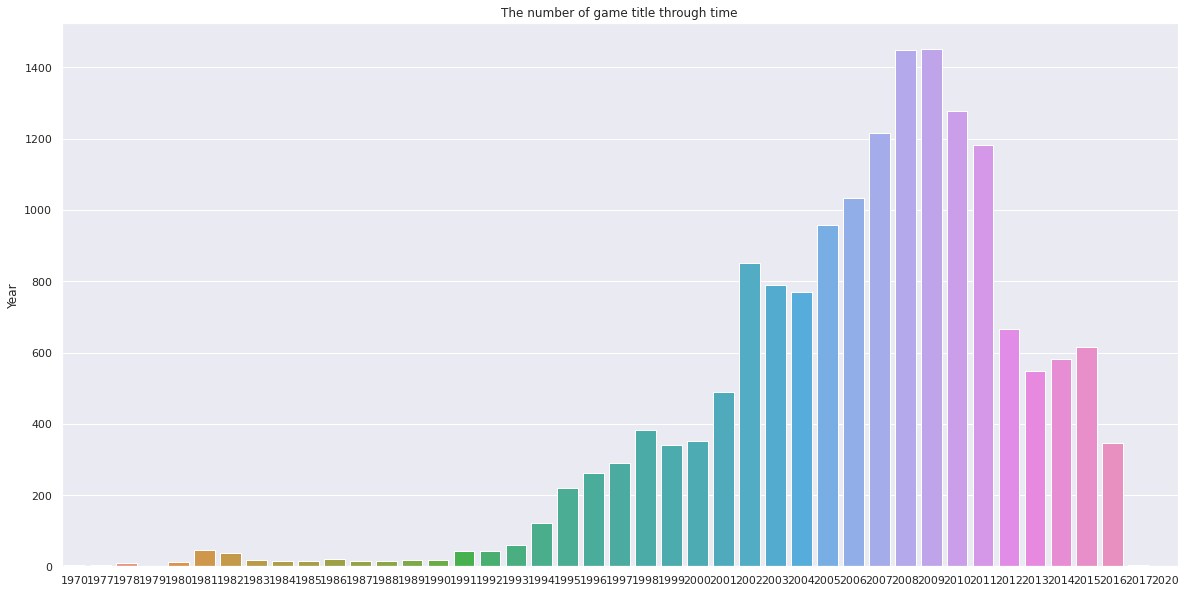

In [7]:
# (2) 연도별 출시된 타이틀 수
fig, ax = plt.subplots()
sns.barplot(x=x, y=y)
plt.title("The number of game title through time")
plt.show()

#### <2> 데이터의 문제점 : 2022년, 혹은 이후를 대비하기엔 다소 오래된 데이터

 우리가 가진 데이터를 확인하면 데이터를 주로 2008년 중심으로 종 모양으로 묘사된다고 할 수 있다.

하지만 의미 있는 데이터가 2017년까지인데 과연 그 전의 데이터가 2022년에 게임을 제작하기에 유용한 데이터인지는 의문이 든다.

따라서 2008년 중심으로 이루어진 데이터는 ***다음 분기에 어떤 게임을 설계해야할까*** 에 대해서 2008년에 인기가 있을법한 게임으로 도출될 가능성이 높다..

##### <2>을 위한 보완할 수 있는 데이터 검증
- 데이터는 2008년을 중심으로 종모양을 그리는 데이터가 맞지만 만약에 이하의 두 가지 가정이 성립한다면 해당 데이터를 2022년, 또는 그 이후에 발매할 게임을 설계하는 데에 좋은 지침을 얻을 수 있을 것이라고 생각할 수 있다.

게임성을 결정하는 요소는 스토리, 아트 스타일, 음악, 조작감, 등등이 존재하지만 데이터에 제시된 요소는 장르 뿐이므로 이후의 서술엔 장르에 대해서만 서술한다.

1.   특정 장르 가 시대의 흐름과 상관 없이 선호받는 게임이 존재할 경우 (장르 선호의 불변성)
2.   혹은 장르가 시대별로 유행이 있어서 현재 우리가 가지고 있는 데이터가 2022년의 유행을 커버할 수 있는 경우 ([게임이 개발되는데 소요되는 시간인 약 2년](https://www.econovill.com/news/articleView.html?idxno=513923)까진 유예할 수 있다) 

이후의 검증에서 1번과 2번에 대해 검증해볼 것이다. 만약에 분석 결과 1번 또는 2번을 만족하지 못한다면 현재 데이터로는 2022년 그리고 그 이후의 게임을 제작하는 데 있어서 좋은 참조가 되지 않을 가능성이 높다.



### (3) 장르별로 발매된 게임 타이틀 수

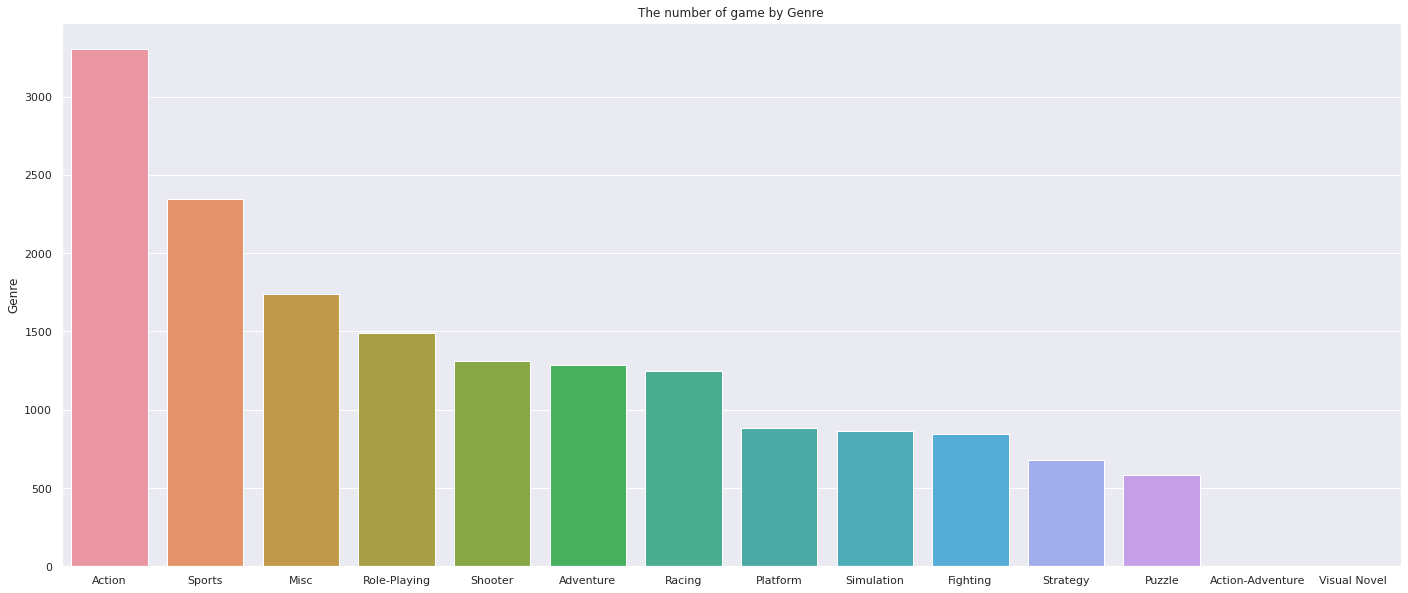

In [8]:
# (3) 장르별로 발매된 게임 타이틀 수
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(24,10)})
y = df.Genre.value_counts()
x = y.index
sns.barplot(x=x, y=y)
plt.title("The number of game by Genre")
plt.show()

In [93]:
df.Genre.value_counts()

Action              3306
Sports              2345
Misc                1737
Role-Playing        1487
Shooter             1309
Adventure           1288
Racing              1248
Platform             885
Simulation           867
Fighting             847
Strategy             679
Puzzle               582
Action-Adventure       2
Visual Novel           1
Name: Genre, dtype: int64

#### <3> 데이터의 문제점 : 다소 편중된 게임 장르

해당 데이터는 장르별로 제법 심각한 Bias가 존재한다. 따라서 상위에 있는 장르에 대한 검정 또는 분석은 상당히 의미 있는 결과를 가져오겠지만 하위, 특히 Action-Adventure 및 visual Novel의 경우에는 검정과 분석을 할 수 없을 정도로 데이터가 너무 적어서 해당 장르가 현 시대에서 매우 조명받는 게임 장르라고 할 지라도 분석 과정을 거치다보면 우리는 해당 장르에 대한 통계적 신뢰성이 보장되지 않는다. (해당 데이터들에 대한 평가는 장르의 유망성이 아니라 해당 게임의 성공 지표를 반영하게 될 것이기 때문에)

하지만 만약 우리가 가진 데이터가 주어진 기간에 발매된 게임들 중 의미 있는 (즉 판매량이 집계된) 데이터들이라는 가정 하에,  적어도 이런 편중 현상이 말하고자 하는 것은 다음과 같다고 이야기할 수 있다.

 데이터가 가르키는 기간 사이에 해당 장르에 대한 게임사의 선호도가 어떻게 되는가. (게이머들의 선호도는 판매량 요소를 반영해야하므로 정확히 맞지는 않다,)

##### <3>을 위한 보완할 수 있는 데이터 검증
- 그래프만 보면 장르에 대한 게임사들의 선호도를 대략적으로 짐작가능 하지만, 실제로 유저들이 해당 장르에 대한 선호도가 존재하여 해당 장르들이 추정할 수 없는 다른 이유 (제작비가 낮다. 빠르게 제작 가능하다 등 제작의 수월성 또는 데이터의 미비)로 인해 저런 편중이 발생한 건지 아니면 실제 수요로 인해 저런 편중이 발생한건지 확인할 필요가 있다.

- 하지만 아무리 유저들이 해당 장르를 좋아한다고 해도 해당하는 모든 장르의 게임을 구매할 가능성은 낮을 수 있다는 점을 유의할 필요가 있다.

### (4) 퍼블리셔 별로 발매된 게임 타이틀 수

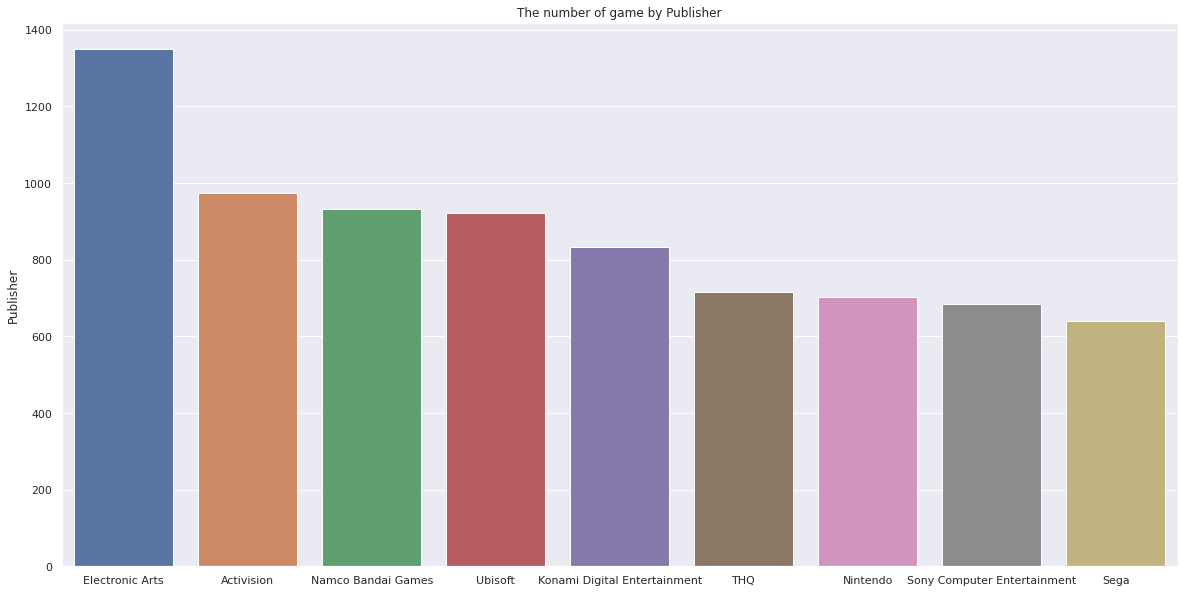

In [94]:
# (4) 퍼블리셔 별로 발매된 게임 타이틀 수
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(24,10)})
y = df.Publisher.value_counts()

x = y.index

for i in range(1000):
  if (y > i).sum() < 10:
    x= y[y>i].index
    y = y[y>i]
    break;

sns.barplot(x=x, y=y)
plt.title("The number of game by Publisher")
plt.show()

수 많은 퍼블리셔 중에 최상위 10개를 추려서 그래프로 나타내었다. 실제 판매량을 들여다봐야겠지만 단순히 퍼블리셔만 두고 봤을 때는 Electronic Arts가 많은 수의 게임을 Publishing 하였다는 것을 확인할 수 있다.

판매량이 ***게임마다 일정했고 장르에 대한 선호성이 편중되지 않았다는 가정*** 이 존재한다면 우리가 만든 게임을 퍼블리싱할 때 Electroic Arts와 협상해보는 것이 좋은 선택일 수 있다.

In [10]:
df_ = df.copy()

### (5) 북미에서 가장 많이 팔린 타이틀

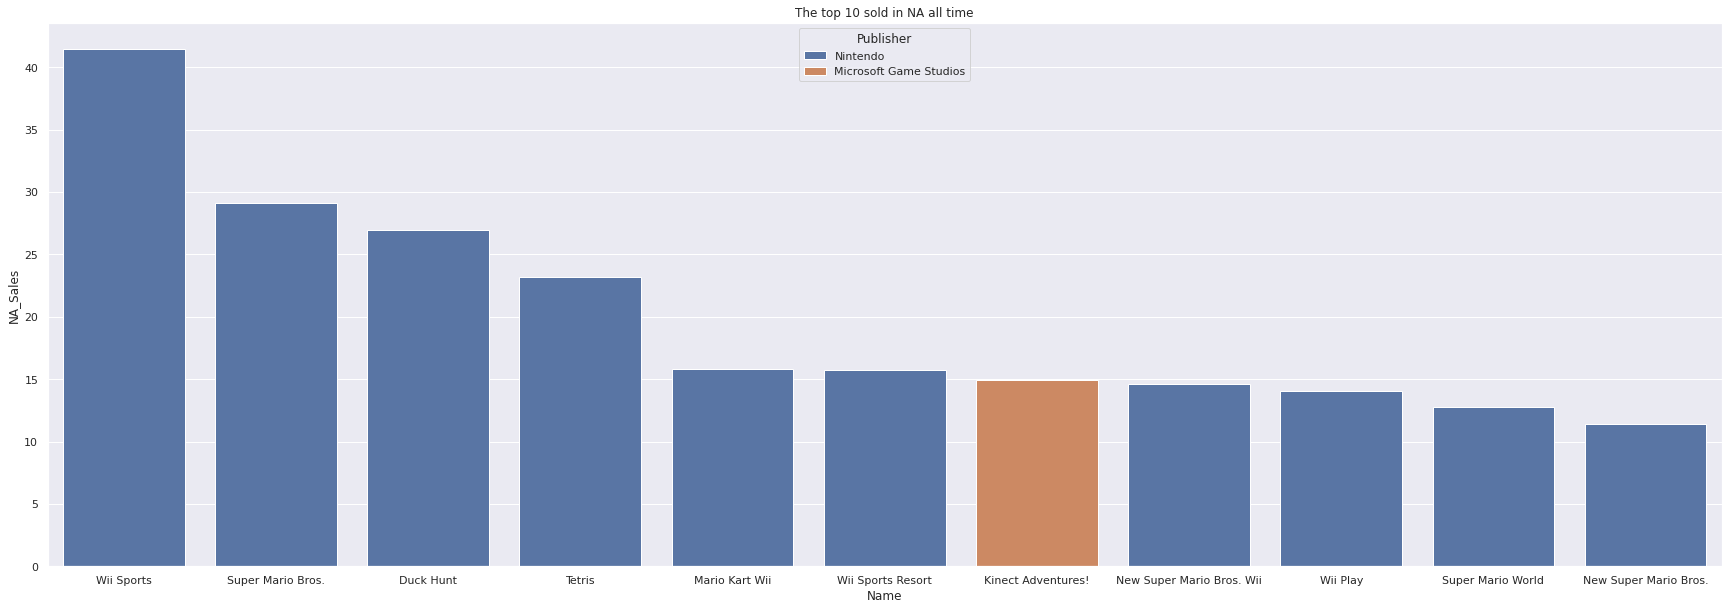

In [116]:
# (5) 북미에서 가장 많이 팔린 타이틀
df_.sort_values(["NA_Sales"], inplace=True, ascending=False)
df_.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(24,10)})
y = df_.NA_Sales.loc[:10]

x = df_.Name.loc[0:10]

sns.barplot(x=x, y=y, hue=df_.Publisher.loc[:10], dodge=False)
plt.title("The top 10 sold in NA all time")
plt.show()

In [100]:
for i in range(10):
  print(i+1, " : ", df_.Name.loc[i],",", df_.Publisher.loc[i])

1  :  Wii Sports , Nintendo
2  :  Super Mario Bros. , Nintendo
3  :  Duck Hunt , Nintendo
4  :  Tetris , Nintendo
5  :  Mario Kart Wii , Nintendo
6  :  Wii Sports Resort , Nintendo
7  :  Kinect Adventures! , Microsoft Game Studios
8  :  New Super Mario Bros. Wii , Nintendo
9  :  Wii Play , Nintendo
10  :  Super Mario World , Nintendo


북미에서 가장 많이 팔린 10개의 타이틀은 위의 10개인데, 독특한 점은 7번 제품을 제외한 나머지 제품이 Nintendo 사 게임이라는 사실이다.

### (6) 유럽에서 가장 많이 팔린 타이틀

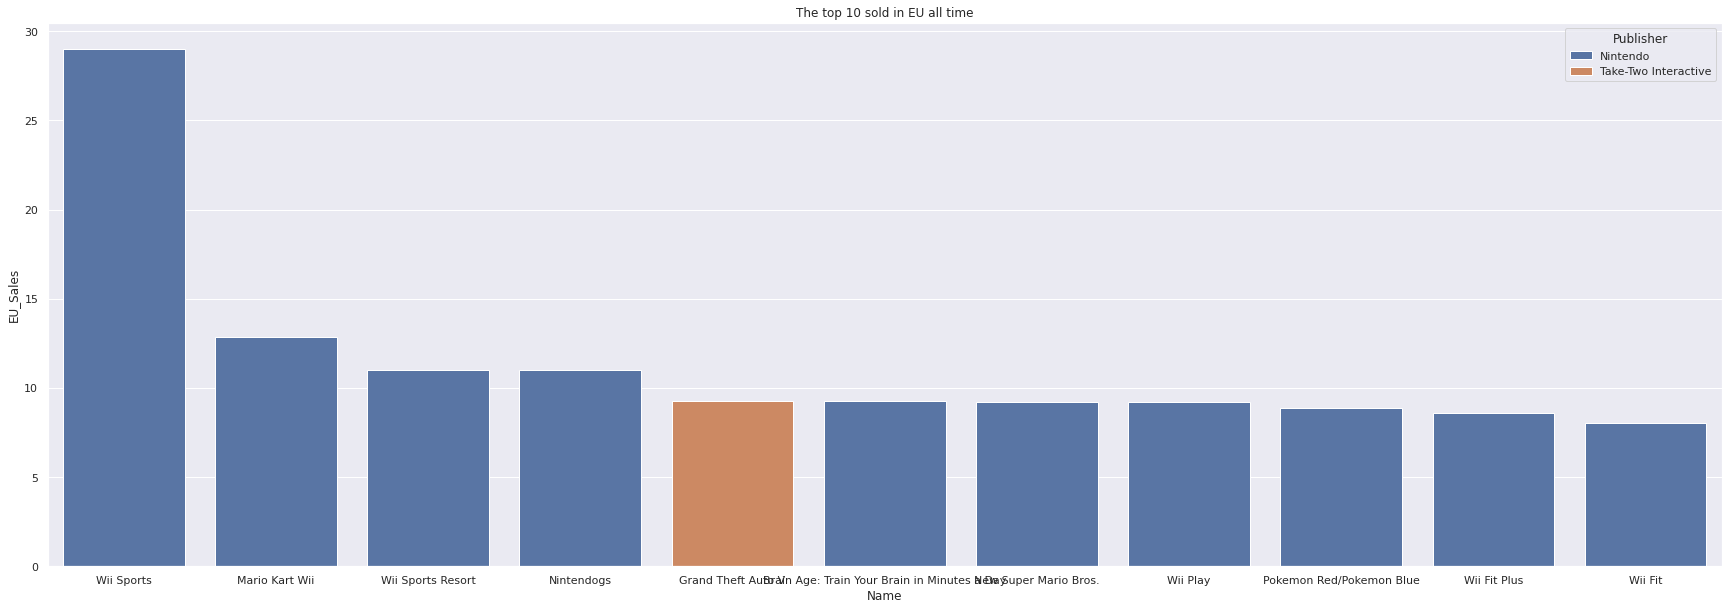

In [115]:
# (6) 유럽에서 가장 많이 팔린 타이틀
df_.sort_values(["EU_Sales"], inplace=True, ascending=False)
df_.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(30,10)})
y = df_.EU_Sales.loc[:10]

x = df_.Name.loc[0:10]

sns.barplot(x=x, y=y, hue=df_.Publisher.loc[:10], dodge=False)
plt.title("The top 10 sold in EU all time")
plt.show()

In [102]:
for i in range(10):
  print(i+1, " : ", df_.Name.loc[i],",", df_.Publisher.loc[i])

1  :  Wii Sports , Nintendo
2  :  Mario Kart Wii , Nintendo
3  :  Wii Sports Resort , Nintendo
4  :  Nintendogs , Nintendo
5  :  Grand Theft Auto V , Take-Two Interactive
6  :  Brain Age: Train Your Brain in Minutes a Day , Nintendo
7  :  New Super Mario Bros. , Nintendo
8  :  Wii Play , Nintendo
9  :  Pokemon Red/Pokemon Blue , Nintendo
10  :  Wii Fit Plus , Nintendo


Eu 지역 또한 북미와 마찬가지 경향을 보이고 있다는 점이 특기할만하다. Take-Two Interactive에서 배급한 GTA 5를 제외한 모든 상위에 10위에 올라간 타이틀이 Nintendo 사 게임 타이틀인것을 확인할 수 있다.

### (7) 일본에서 가장 많이 팔린 타이틀

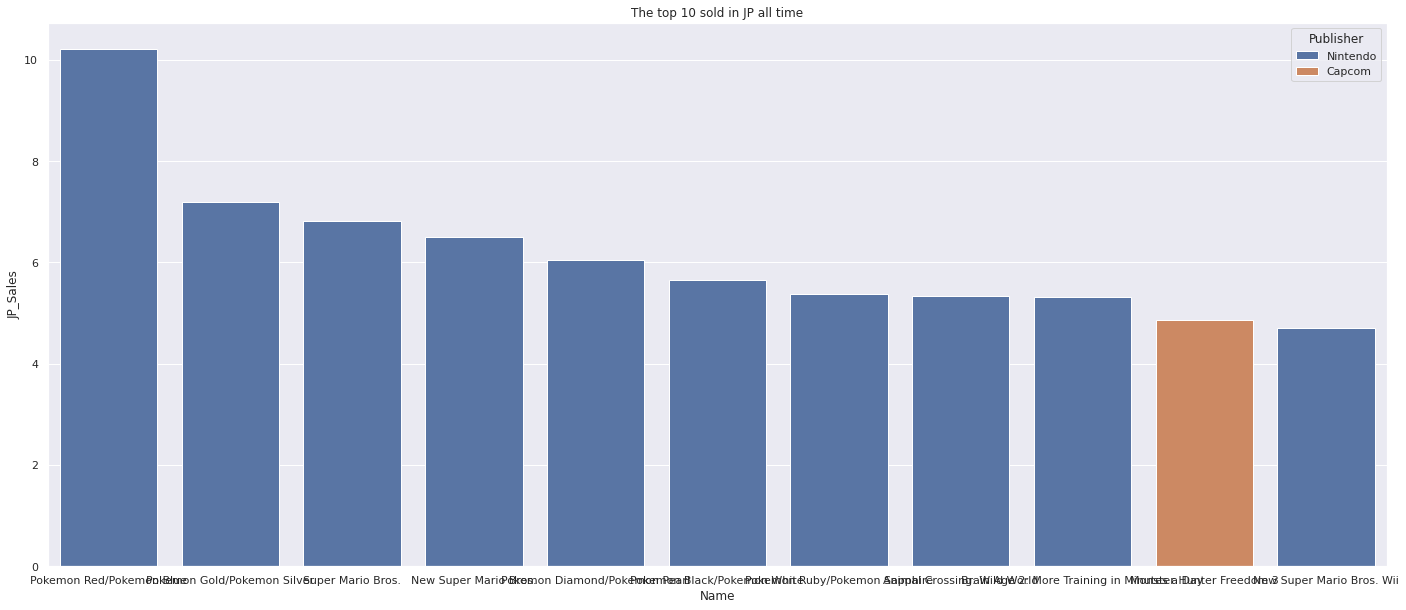

In [117]:
# (7) 일본에서 가장 많이 팔린 타이틀
df_.sort_values(["JP_Sales"], inplace=True, ascending=False)
df_.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(30,10)})
y = df_.JP_Sales.loc[:10]

x = df_.Name.loc[0:10]

sns.barplot(x=x, y=y, hue=df_.Publisher.loc[:10], dodge=False)
plt.title("The top 10 sold in JP all time")
plt.show()

In [104]:
for i in range(10):
  print(i+1, " : ", df_.Name.loc[i],",", df_.Publisher.loc[i])

1  :  Pokemon Red/Pokemon Blue , Nintendo
2  :  Pokemon Gold/Pokemon Silver , Nintendo
3  :  Super Mario Bros. , Nintendo
4  :  New Super Mario Bros. , Nintendo
5  :  Pokemon Diamond/Pokemon Pearl , Nintendo
6  :  Pokemon Black/Pokemon White , Nintendo
7  :  Pokemon Ruby/Pokemon Sapphire , Nintendo
8  :  Animal Crossing: Wild World , Nintendo
9  :  Brain Age 2: More Training in Minutes a Day , Nintendo
10  :  Monster Hunter Freedom 3 , Capcom


일본 지역의 Nintendo 독식은 다른 지역과 다를바가 없지만 더욱 특이할만한 요소는 상위 타이틀의 대부분이 Pokemon이 차지한다는 점이다.

 EDA1 과정에서 Pokemon X/Pokemon Y가 삭제되었는데, 만약 이를 포함했다면 1에서 10위까지 모두 nintendo 회사의 제품이며 그 중에서도 6개가 포켓몬이었을 것이다.

### (8) 기타 지역에서 가장 많이 팔린 타이틀

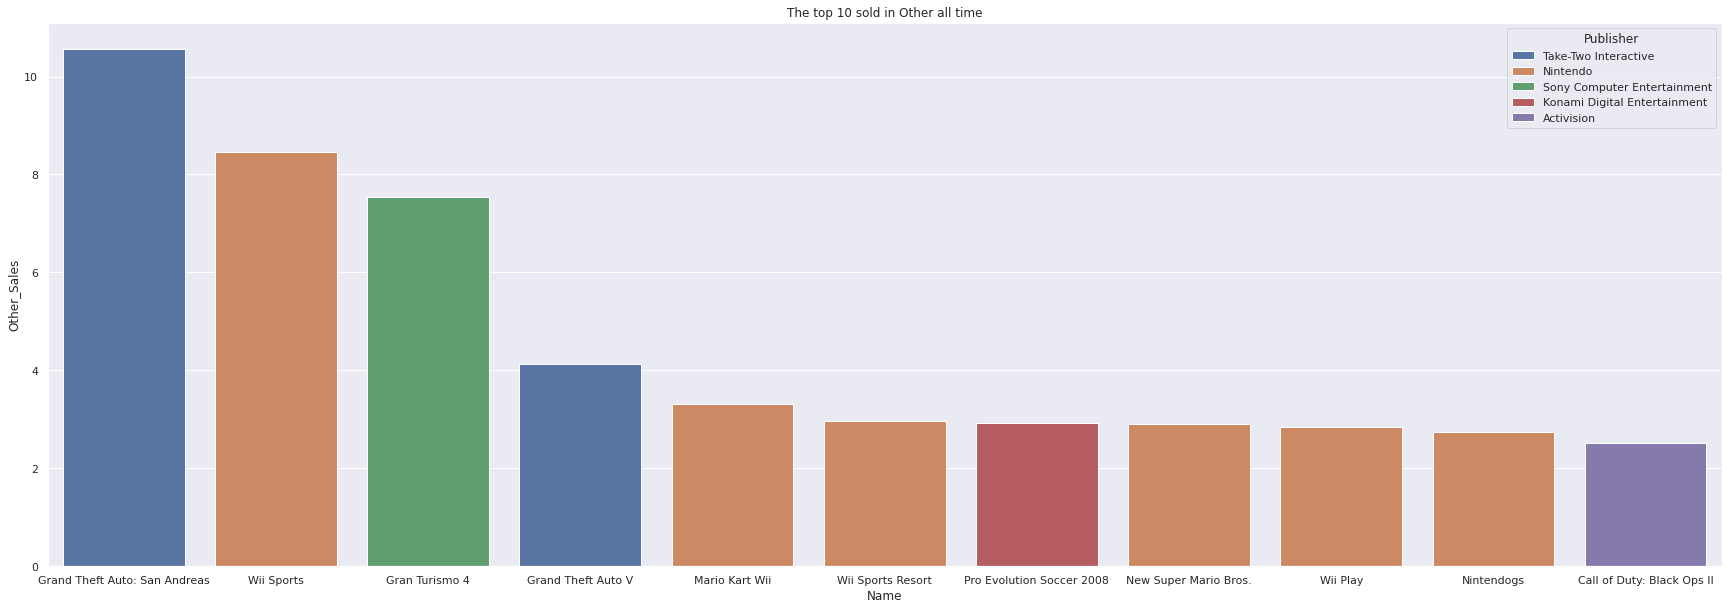

In [118]:
# (8) 기타 지역에서 가장 많이 팔린 타이틀
df_.sort_values(["Other_Sales"], inplace=True, ascending=False)
df_.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(30,10)})
y = df_.Other_Sales.loc[:10]

x = df_.Name.loc[0:10]

sns.barplot(x=x, y=y, hue=df_.Publisher.loc[:10], dodge=False)
plt.title("The top 10 sold in Other all time")
plt.show()

In [106]:
for i in range(10):
  print(i+1, " : ", df_.Name.loc[i],",", df_.Publisher.loc[i])

1  :  Grand Theft Auto: San Andreas , Take-Two Interactive
2  :  Wii Sports , Nintendo
3  :  Gran Turismo 4 , Sony Computer Entertainment
4  :  Grand Theft Auto V , Take-Two Interactive
5  :  Mario Kart Wii , Nintendo
6  :  Wii Sports Resort , Nintendo
7  :  Pro Evolution Soccer 2008 , Konami Digital Entertainment
8  :  New Super Mario Bros. , Nintendo
9  :  Wii Play , Nintendo
10  :  Nintendogs , Nintendo


그외 지역은 아무래도 다양한 나라와 문화를 엮어서 하나의 표로 만들어서 그러한지 특정 게임 회사 선호 경향이 적어졌지만 여전히 Nintendo의 많은 게임이 상위를 차지하고 GTA가 상위권을 차지하는 것을 확인할 수 있다.

## 2) Data Over Time

In [54]:
def get_counts_among_two_value(x, y, df):
  data = df[[y,x]].value_counts()
  data = data.unstack(level=1).transpose().fillna(0)
  return data

In [87]:
get_counts_among_two_value("Year", "Platform", df_).head()

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
1970,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1977,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1978,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1979,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### (1) 최근에 게임들은 어떤 플랫폼에 출시되고 있는가?

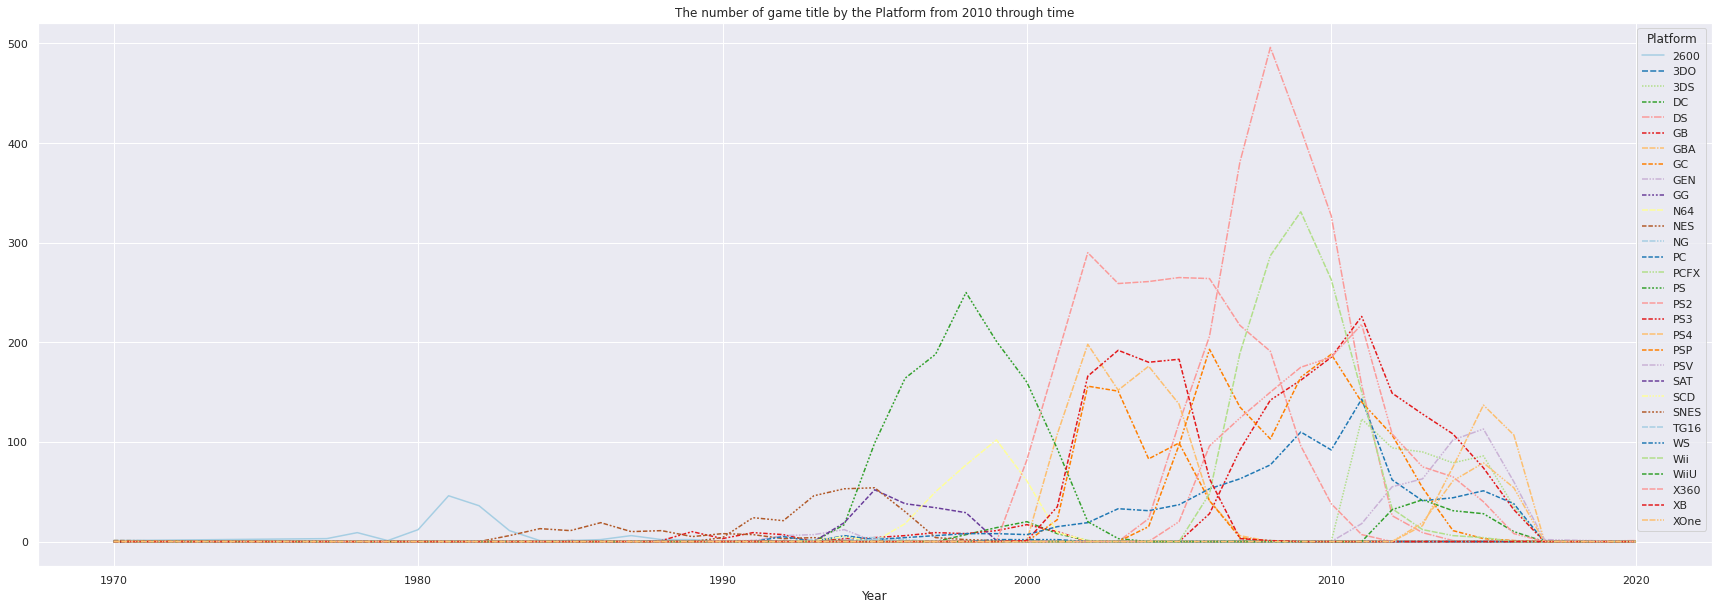

In [119]:
# 전 데이터 플롯
fig, ax = plt.subplots()

data = get_counts_among_two_value("Year", "Platform", df_)

sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=data, palette="Paired")
plt.title("The number of game title by the Platform from 2010 through time")
plt.show()

데이터가 많아서 해석하기 힘들고 우리가 원하는 것은 가장 최신 트렌드이므로 2015년 이후의 데이터를 확인하는 것으로 하자.

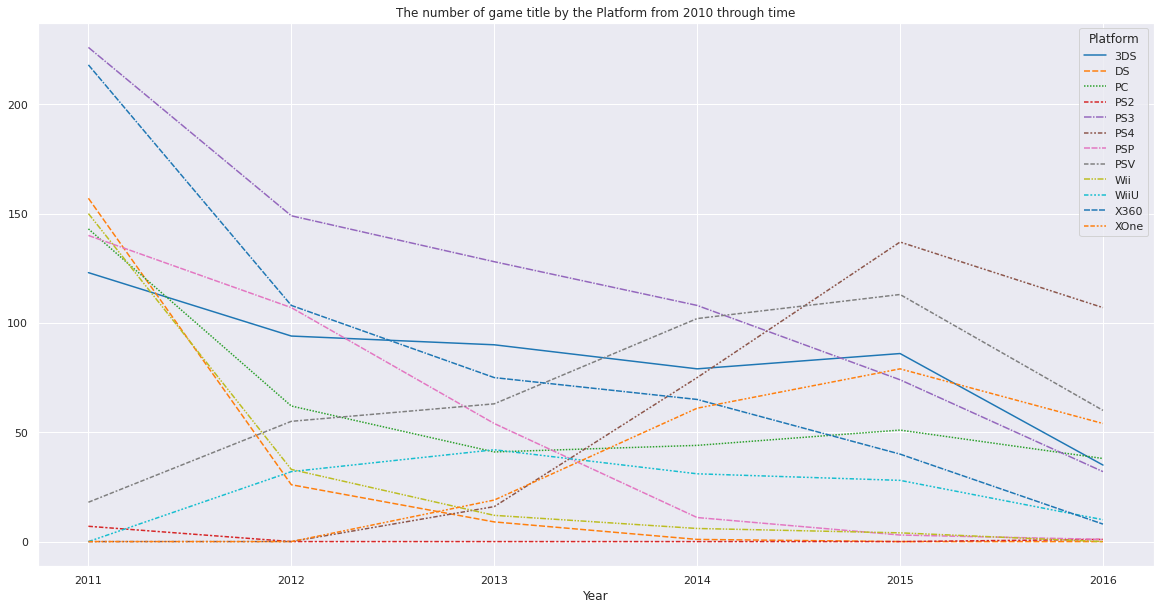

In [125]:
# 2010년 이전의 데이터는 제외 후 출력
fig, ax = plt.subplots()

data = get_counts_among_two_value("Year", "Platform", df_)

data_filter = data.loc["2011":"2016"]
data_filter = data_filter.loc[:, data_filter.sum(axis=0) > 0]
data_filter.columns = data_filter.columns.astype("str")

sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=pd.DataFrame(data_filter), palette="tab10")
plt.title("The number of game title by the Platform from 2011 through time")
plt.show()

아마 2017 년 이후로는 데이터 부족으로 각 항목이 0으로 수렴하는 것으로 보여서 2016년 까지의 데이터를 출력하였다. 하지만 그전에서의 경향성을 살펴보면 

상대적으로 구 기종인 3ds, ds, ps2, ps3, psp, wii, wiiU는 하락하는 추세이고

상대적으로 신 기종인 psv, ps4, XOne는 상승하는 추세를 보였다.



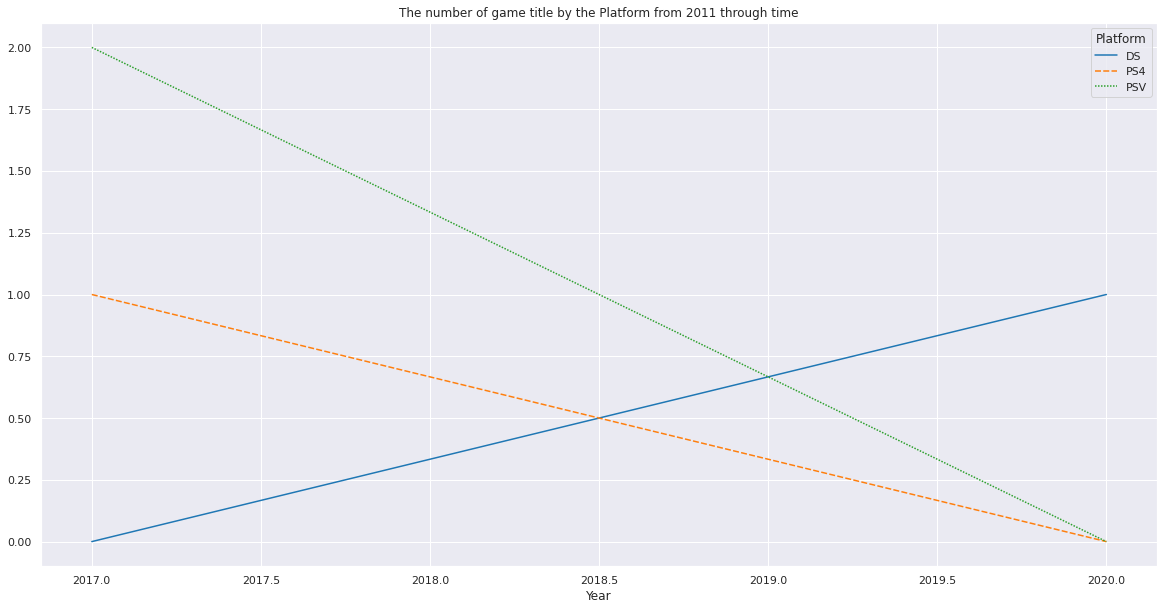

In [127]:
# 2017년 이후의 데이터는 어떨까?
fig, ax = plt.subplots()

data = get_counts_among_two_value("Year", "Platform", df_)

data_filter = data.loc["2017":"2020"]
data_filter = data_filter.loc[:, data_filter.sum(axis=0) > 0]
data_filter.columns = data_filter.columns.astype("str")

sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=pd.DataFrame(data_filter), palette="tab10")
plt.title("The number of game title by the Platform from 2011 through time")
plt.show()